In [9]:
from fastai.vision import *

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

proj_path = r"dataset"
p_path = Path(proj_path)

df = pd.read_csv("modified_category.csv")
df.head()

#PICK IMAGE SIZE#
img_size = 256

np.random.seed(90)
data = (ImageList.from_df(df, "./")
                    .split_by_rand_pct(0.2)
                    .label_from_df()
                    .transform(get_transforms(), size= img_size)
                    .databunch(bs=6)).normalize(imagenet_stats)

data.show_batch()

FileNotFoundError: [Errno 2] No such file or directory: './dataset\\Humour\\0000805.jpg'

In [6]:
############ Create Model ############
from fastai.metrics import accuracy, Precision, Recall
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, Precision(average='macro'), Recall(average='macro')], opt_func=optim.SGD)

#categories to predict
data.classes

#no of categories present
data.c

#length of training set
len(data.train_ds)

#length of validation set
len(data.valid_ds)

578

In [7]:
############ Train Model ############
# Build the CNN model with the pretrained resnet34
# Error rate = 1 - accuracy

#EDIT NUMBER OF EPOCHS, CAN ALSO ADD A LEARNING RATE (e.g. lr = 0.003)    
# Train the model on # epochs of data at the default learning rate
learn.data.batch_size = 50
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,1.378656,0.859170,0.653979,0.656693,0.650448,00:17
1,1.151473,0.794967,0.692042,0.696666,0.688623,00:17
2,0.964519,0.741208,0.695502,0.715775,0.696432,00:17
3,0.845253,0.687035,0.709343,0.713079,0.707167,00:17
4,0.757014,0.680680,0.726644,0.728762,0.724819,00:17
5,0.663676,0.691358,0.730104,0.733720,0.730323,00:17
6,0.581604,0.739736,0.711073,0.725135,0.709684,00:17
7,0.528933,0.737299,0.717993,0.728381,0.718361,00:17
8,0.489226,0.719799,0.738754,0.741288,0.736958,00:17
9,0.438525,0.698335,0.745675,0.756329,0.744466,00:18


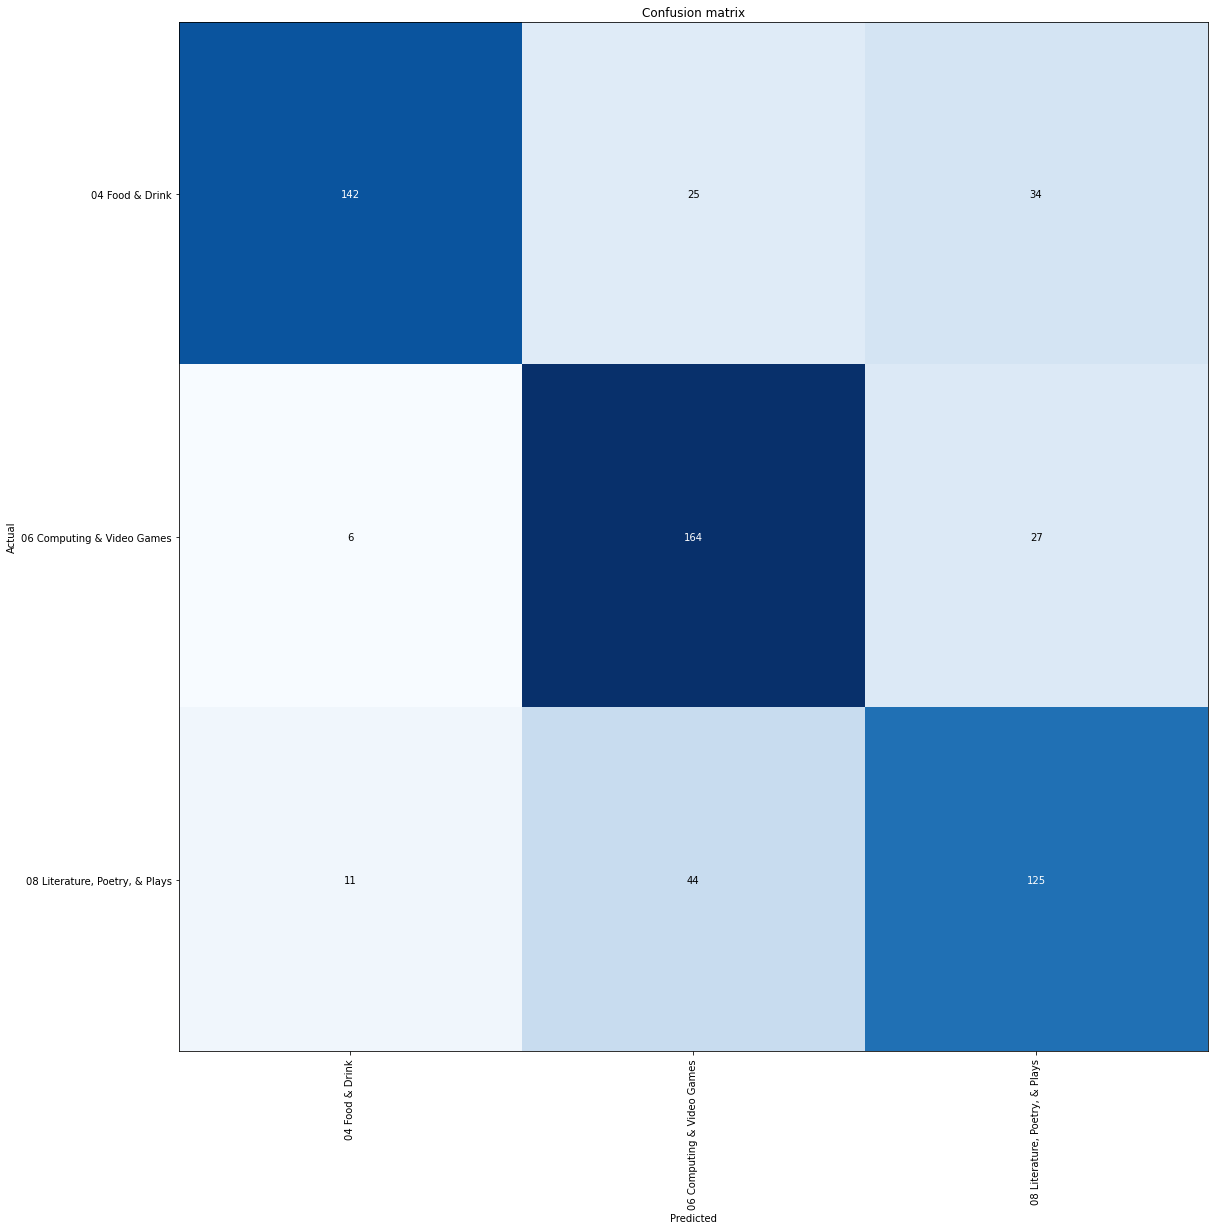

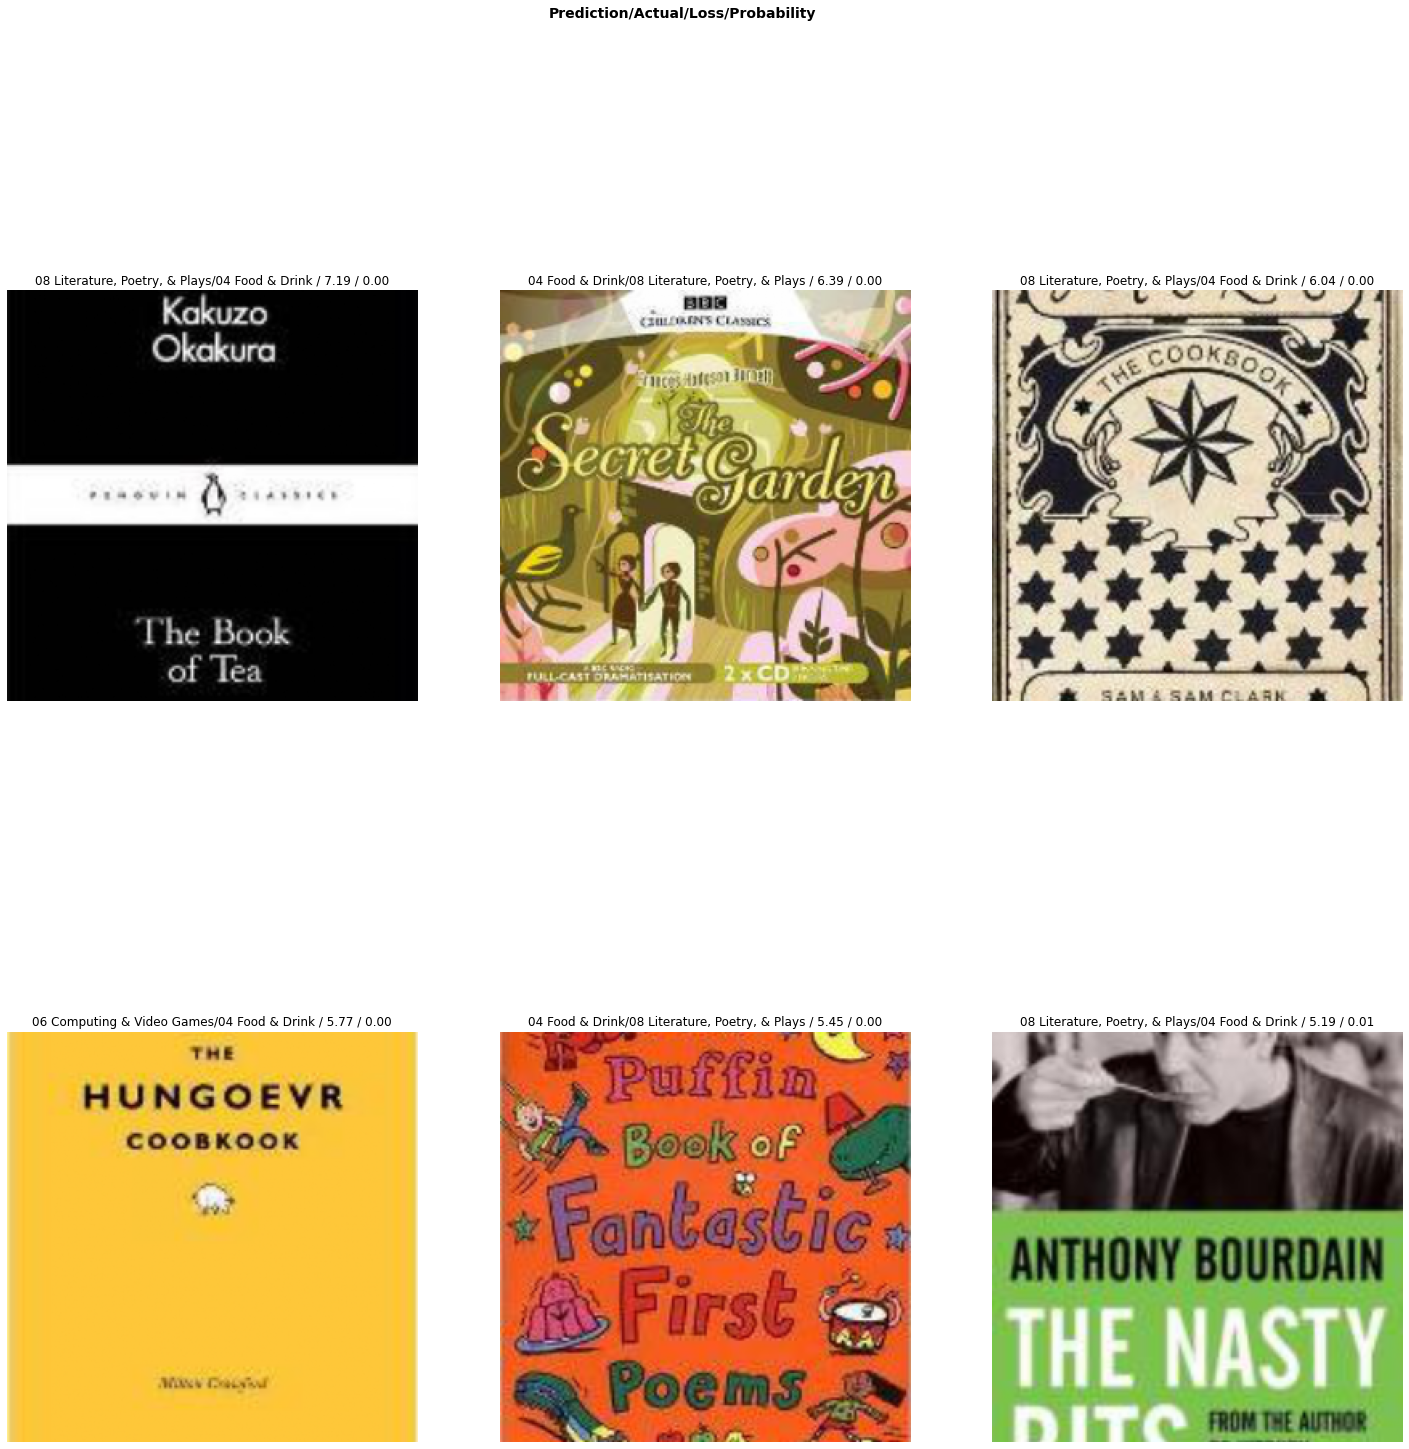

In [8]:
learn.fit(10, 0.005)


#NOT SURE WHERE/HOW IT'S SAVING IT
# save model
learn.save('res34-stage1')

############ Evaluate Model ############
interp = ClassificationInterpretation.from_learner(learn)

# confusion matrix: actual on left, predicted on right
interp.plot_confusion_matrix(figsize=(17, 17))


# print out the most mis-classified classes
interp.most_confused()

# plotting the top losses
interp.plot_top_losses(6, figsize=(25,25))